In [107]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.2
    plt.rcParams["grid.linestyle"] = "-"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 16
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 18

    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']

# Call once at the top of your script
set_default_plot_style()


In [125]:

N_val = 4
base_data_path = f"../data/s_diff_per_time/N{N_val}"

def parse_a_val(a_str):
    return float(a_str.replace("p", "."))

def parse_z_val(z_str):
    return float(z_str.replace("p", "."))

a_vals = [0.2, 0.4, 0.6, 0.7]
L_vals = [32, 64, 128]

cmap = [(0.1, 0.1, 0.8, 1), (0.8, 0.25, 0.25, 1), (0.75, 0.1, 0.75, 1), (0.1, 0.8, 0.1, 1) ]


In [9]:
s_diffs_per_time = {}
s_errs_per_time = {}
for a_folder in os.listdir(base_data_path):
    if not a_folder.startswith("a"):
        continue

    a_val = parse_a_val(a_folder[1:])
    a_path = os.path.join(base_data_path, a_folder, "IC1")

    if not os.path.isdir(a_path):
        continue

    print(f"Found a = {a_val}")

    for L_folder in os.listdir(a_path):
        if not L_folder.startswith("L"):
            continue

        L_val = int(L_folder[1:])
        L_path = os.path.join(a_path, L_folder)

        print(f"  L = {L_val}")

        sample_files = [
            f for f in os.listdir(L_path)
            if f.endswith(".csv")
        ]

        if len(sample_files) == 0:
            print(f"    WARNING: No CSVs found for L={L_val}, a={a_val}")
            continue

        all_samples = []

        for sample_file in sample_files:
            file_path = os.path.join(L_path, sample_file)
            df = pd.read_csv(file_path)

            # load as numpy array
            s_vals = df["s_diff"].values.astype(float)
            all_samples.append(s_vals)

        data_matrix = np.vstack(all_samples)

        avg_vals = np.mean(data_matrix, axis=0)
        err_vals = np.std(data_matrix, axis=0, ddof=1) / np.sqrt(len(all_samples))

        s_diffs_per_time[(L_val, a_val)] = avg_vals
        s_errs_per_time[(L_val, a_val)] = err_vals

        print(f"Loaded {len(all_samples)} samples.")


print("\n==== Summary Loaded ====")
for (L_val, a_val), arr in s_diffs_per_time.items():
    print(f"(L={L_val}, a={a_val}) → {len(arr)} timepoints")

print("\nDictionaries Ready:")
print(" - s_diffs_per_time[(L,a)]")
print(" - s_errs_per_time[(L,a)]")

Found a = 0.7
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.8
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.6
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.4
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.2
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.

==== Summary Loaded ====
(L=32, a=0.7) → 256 timepoints
(L=128, a=0.7) → 2353 timepoints
(L=64, a=0.7) → 776 timepoints
(L=32, a=0.8) → 256 timepoints
(L=128, a=0.8) → 2353 timepoints
(L=64, a=0.8) → 776 timepoints
(L=32, a=0.6) → 256 timepoints
(L=128, a=0.6) → 2353 timepoints
(L=64, a=0.6) → 776 timepoints
(L=32, a=0.4) → 256 timepoints
(L=128, a=0.4) → 2353 timepoints
(L=64, a=0.4) → 776 timepoints
(L=32, a=0.2) → 256 timepoints
(L=128, a=0.2) → 2353 timepoints
(L=64

In [10]:
s_diffs_per_time

{(32,
  0.7): array([1.00000000e-05, 1.15335256e-05, 9.05638994e-06, 7.26328222e-06,
        5.47180771e-06, 4.16583786e-06, 3.02100726e-06, 2.25371367e-06,
        1.67627416e-06, 1.21745316e-06, 8.80260428e-07, 6.47009368e-07,
        4.62897717e-07, 3.39050756e-07, 2.42701145e-07, 1.74782689e-07,
        1.24606220e-07, 8.91981372e-08, 6.37295942e-08, 4.53658079e-08,
        3.22074516e-08, 2.27759441e-08, 1.64277776e-08, 1.17358541e-08,
        8.30841167e-09, 5.96379538e-09, 4.24284854e-09, 3.06025765e-09,
        2.16689485e-09, 1.55507289e-09, 1.11796240e-09, 7.99353892e-10,
        5.69988675e-10, 4.03632417e-10, 2.82925118e-10, 2.01250451e-10,
        1.43091266e-10, 1.01341487e-10, 7.19843470e-11, 5.09220850e-11,
        3.56703449e-11, 2.51592197e-11, 1.78040020e-11, 1.25340015e-11,
        8.85710942e-12, 6.30368213e-12, 4.47229227e-12, 3.15336847e-12,
        2.22186555e-12, 1.57097341e-12, 1.10329081e-12, 7.84152865e-13,
        5.51622735e-13, 3.91726159e-13, 2.77592338e

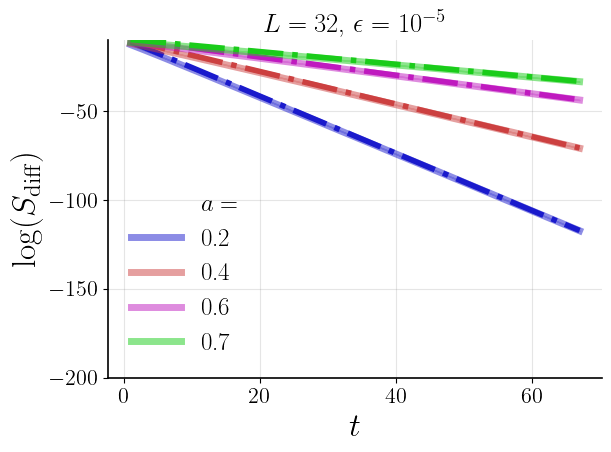

/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1924503482.py:7: RuntimeWarning: divide by zero encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1924503482.py:7: RuntimeWarning: overflow encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1924503482.py:7: RuntimeWarning: invalid value encountered in multiply
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1924503482.py:13: RuntimeWarning: divide by zero encountered in log
  (np.log(s_diff_data) + log_sdiff_err)[1:t_limit],
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1924503482.py:14: RuntimeWarning: divide by zero encountered in log
  (np.log(s_diff_data) - log_sdiff_err)[1:t_limi

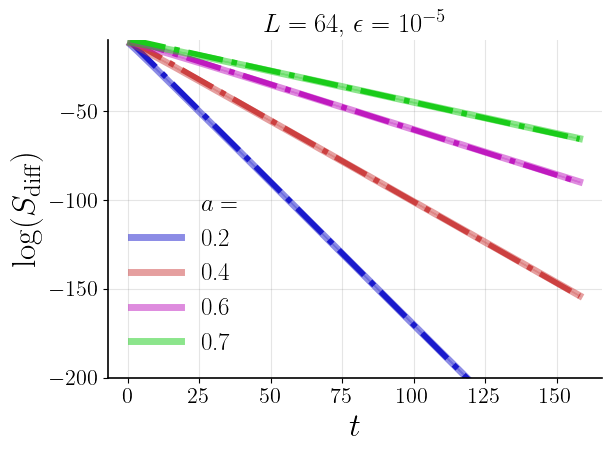

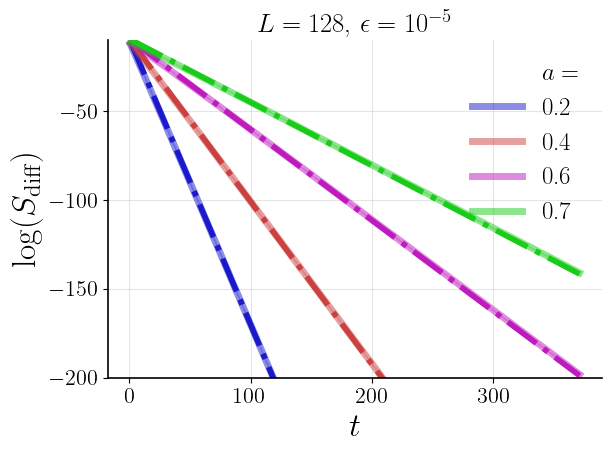

In [127]:
for L_val in L_vals:
    plt.plot([], [], c = (0, 0, 0, 0), label=r"$a = $")
    t_limit = int(L_val ** 1.22)
    for i, a_val in enumerate(a_vals):
        c = cmap[i]
        s_diff_data = np.array(s_diffs_per_time[(L_val, a_val)])
        log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])

        times = [i for i in range(len(s_diff_data))][1:t_limit]
        # Plot actuall data
        plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=5, alpha=0.5)
        plt.fill_between(times,
                         (np.log(s_diff_data) + log_sdiff_err)[1:t_limit],
                         (np.log(s_diff_data) - log_sdiff_err)[1:t_limit], color=c, alpha=0.25)
        offset = np.log(10**(-5.)) + 2.1
        plt.plot(times, np.log(a_val) * np.array(times) + offset, color=c, linestyle = "-.", linewidth=4)
    plt.ylim(-200,-10)
    plt.title(rf"$L = {L_val}$, $\epsilon = 10^{{-5}}$")
    plt.legend()
    plt.xlabel(r"$t$")
    plt.ylabel(r"$\log(S_{\mathrm{diff}})$")
    parent_path = "../figs/other/"
    os.makedirs(parent_path, exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{parent_path}s_diff_at_const_dists_L{L_val}.png")
    plt.show()